In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [3]:
data = pd.read_csv("D:/CodeClause/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
data.shape

(7043, 21)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
##Univariate Analysis
categorical_var = list(data.dtypes.loc[data.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

17
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [11]:
categorical_var.remove('customerID')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

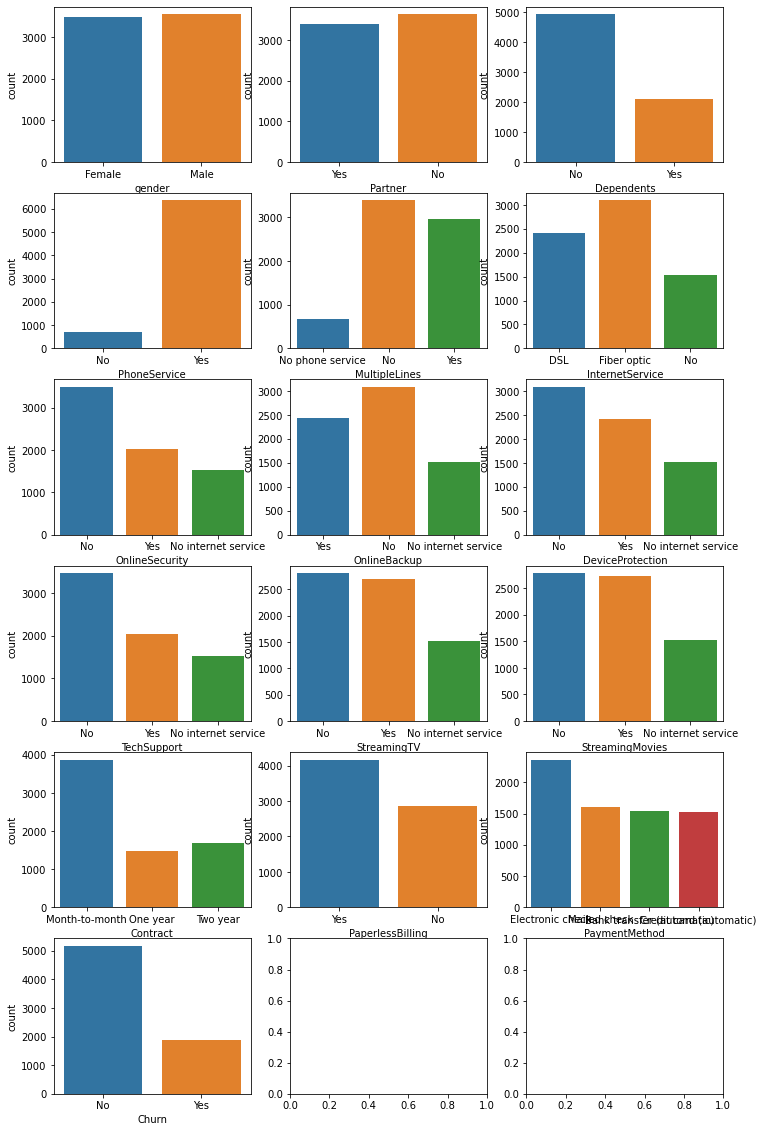

In [12]:
fig, ax =plt.subplots(6,3,figsize=(12,20))


sns.countplot(data['gender'], ax=ax[0][0])
sns.countplot(data['Partner'], ax=ax[0][1])
sns.countplot(data['Dependents'], ax=ax[0][2])

sns.countplot(data['PhoneService'], ax=ax[1][0])
sns.countplot(data['MultipleLines'], ax=ax[1][1])
sns.countplot(data['InternetService'], ax=ax[1][2])

sns.countplot(data['OnlineSecurity'], ax=ax[2][0])
sns.countplot(data['OnlineBackup'], ax=ax[2][1])
sns.countplot(data['DeviceProtection'], ax=ax[2][2])

sns.countplot(data['TechSupport'], ax=ax[3][0])
sns.countplot(data['StreamingTV'], ax=ax[3][1])
sns.countplot(data['StreamingMovies'], ax=ax[3][2])

sns.countplot(data['Contract'], ax=ax[4][0])
sns.countplot(data['PaperlessBilling'], ax=ax[4][1])
sns.countplot(data['PaymentMethod'], ax=ax[4][2])

sns.countplot(data['Churn'], ax=ax[5][0])

fig.show()

In [13]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

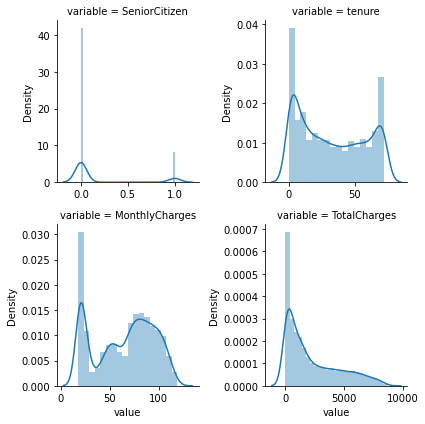

In [14]:
nd = pd.melt(data, value_vars = continuous_var)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=2, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

<AxesSubplot:>

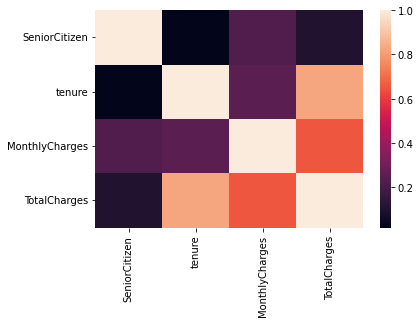

In [15]:
corr = data[continuous_var].corr()
sns.heatmap(corr)

In [16]:
print (corr['TotalCharges'].sort_values(ascending=False), '\n')

TotalCharges      1.000000
tenure            0.825880
MonthlyCharges    0.651065
SeniorCitizen     0.102411
Name: TotalCharges, dtype: float64 



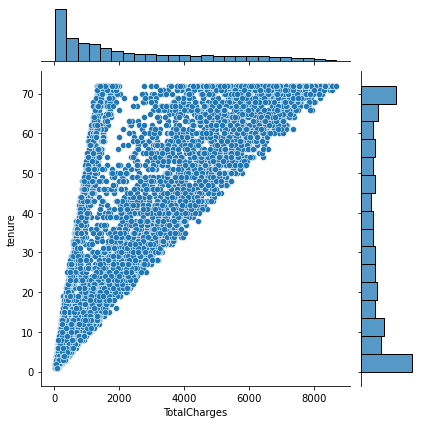

In [17]:
sns.jointplot(x=data['TotalCharges'], y=data['tenure'])

In [18]:
for var in categorical_var:
    if var!='Churn':
        test = data.groupby([var,'Churn'])
        print(test.size(),'\n\n')

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64 


Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64 


Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64 


PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
dtype: int64 


MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
dtype: int64 


InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
dtype: int64 


OnlineSecurity  

In [19]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical_var:
    cT.TestIndependence(colX=var,colY="Churn" ) 

gender is NOT an important predictor. (Discard gender from model)
Partner is IMPORTANT for Prediction
Dependents is IMPORTANT for Prediction
PhoneService is NOT an important predictor. (Discard PhoneService from model)
MultipleLines is IMPORTANT for Prediction
InternetService is IMPORTANT for Prediction
OnlineSecurity is IMPORTANT for Prediction
OnlineBackup is IMPORTANT for Prediction
DeviceProtection is IMPORTANT for Prediction
TechSupport is IMPORTANT for Prediction
StreamingTV is IMPORTANT for Prediction
StreamingMovies is IMPORTANT for Prediction
Contract is IMPORTANT for Prediction
PaperlessBilling is IMPORTANT for Prediction
PaymentMethod is IMPORTANT for Prediction
Churn is IMPORTANT for Prediction


In [20]:
##3. Categorical-Continuous Variables
#ANOVA test

In [21]:
# ANOVA test
import scipy.stats as stats
    
for var in continuous_var:    
    result = stats.f_oneway(data[var][data['Churn'] == 'Yes'], 
                            data[var][data['Churn'] == 'No'])
    print(var)
    print(result)


SeniorCitizen
F_onewayResult(statistic=164.04142445613567, pvalue=3.839860055795412e-37)
tenure
F_onewayResult(statistic=997.2680104991438, pvalue=7.999057960610892e-205)
MonthlyCharges
F_onewayResult(statistic=273.4637042077133, pvalue=2.7066456068950115e-60)
TotalCharges
F_onewayResult(statistic=nan, pvalue=nan)


In [22]:
#t-test/z-test

from sklearn.feature_selection import SelectKBest
from scipy.stats import ttest_ind

t_stat = []
for var in continuous_var:
    var_no_churn = data[var][data["Churn"] == "No"]
    var_yes_churn = data[var][data["Churn"] == "Yes"]
    t_value = ttest_ind(var_no_churn, var_yes_churn, equal_var=False)
    print(var)
    print(t_value)
    #t_stat.append(t_value)

SeniorCitizen
Ttest_indResult(statistic=-11.343877067371809, pvalue=3.587587201830332e-29)
tenure
Ttest_indResult(statistic=34.82381869631297, pvalue=1.1954945472607148e-232)
MonthlyCharges
Ttest_indResult(statistic=-18.407526676414673, pvalue=8.592449331547539e-73)
TotalCharges
Ttest_indResult(statistic=nan, pvalue=nan)


In [23]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [25]:
categorical_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [26]:
#first convert all the string columns to categorical form
for var in categorical_var:
    data[var] = data[var].astype('category')

In [27]:
data[categorical_var] = data[categorical_var].apply(lambda x: x.cat.codes)

In [28]:
target = data['Churn']
data=data.drop('customerID',axis=1)
all_columns = list(data.columns)
all_columns.remove('Churn')

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data[all_columns] # Features
y = data['Churn'] # Target variable

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False  True False  True False  True False False  True  True False  True
 False False  True  True False False False]
Feature Ranking: [ 9  1  8  1  3  1  2  6  1  1  4  1 11 10  1  1  5  7 12]


In [30]:
selected_features_rfe = list(fit.support_)

In [31]:
##Model buidling
#using RFE + logistic_regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

final_features_rfe = []    
for status, var in zip(selected_features_rfe, all_columns):
    if status == True:
        final_features_rfe.append(var)
        
final_features_rfe

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

In [33]:
X_rfe_lr = data[final_features_rfe]
y = data['Churn']

X_train_rfe_lr,X_test_rfe_lr,y_train_rfe_lr,y_test_rfe_lr=train_test_split(X_rfe_lr,y,test_size=0.25,random_state=0)

lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train_rfe_lr,y_train_rfe_lr)
y_pred_rfe_lr=lr_model.predict(X_test_rfe_lr)

acc_rfe_lr = metrics.accuracy_score(y_test_rfe_lr, y_pred_rfe_lr)
print("Accuracy: ",acc_rfe_lr)

Accuracy:  0.7677455990914254


In [34]:
#Logistic regression

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
lr_model_single = LogisticRegression()

# fit the model with data
lr_model_single.fit(X_train,y_train)
y_pred=lr_model_single.predict(X_test)

lr_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",lr_acc)

Accuracy:  0.7950028392958546


In [36]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1153,  145],
       [ 216,  247]], dtype=int64)

In [37]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_rfe_lr)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)

Text(0.5, 0, 'False Positive Rate')

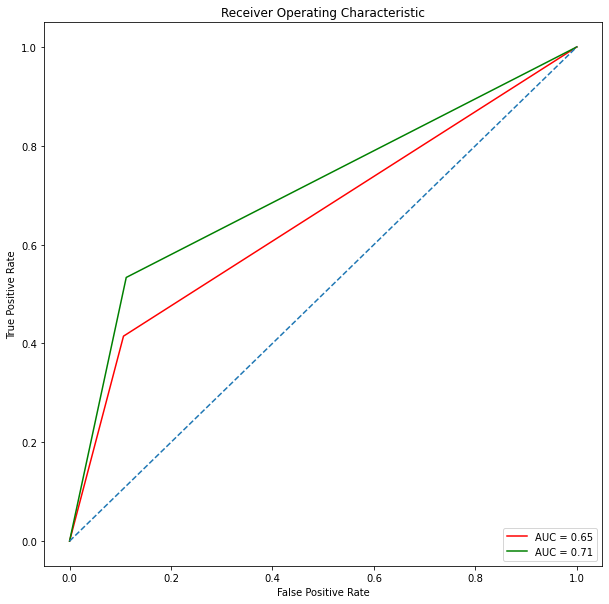

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'AUC = %0.2f' % roc_auc_1)
plt.plot(fpr_2,tpr_2, color='green',label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')